## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** DIP (7)
---
## **Section:** AI22F-Blue


**Discrete Fourier Transform (DFT)**

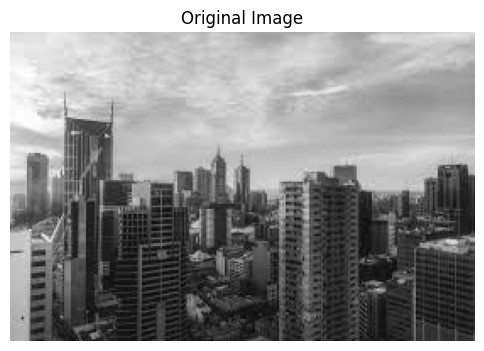

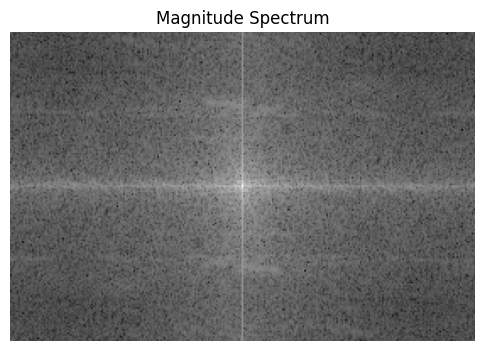

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/image-DIPlab.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.figure(figsize=(6,6))
plt.title('DFT Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

**Inverse Discrete Fourier Transform (IDFT)**

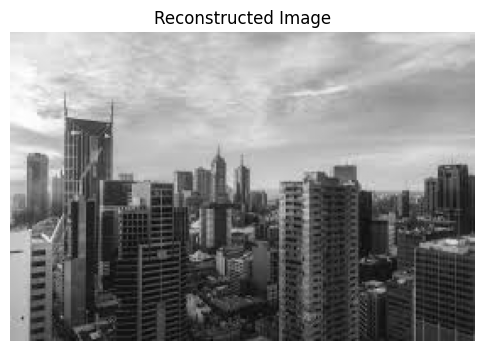

In [ ]:
idft_shift = np.fft.ifftshift(dft_shift)
image_reconstructed = cv2.idft(idft_shift)
image_reconstructed = cv2.magnitude(image_reconstructed[:,:,0], image_reconstructed[:,:,1])

plt.figure(figsize=(6,6))
plt.title('Reconstructed Image')
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

**Low-Pass Filtering (Smoothing)**

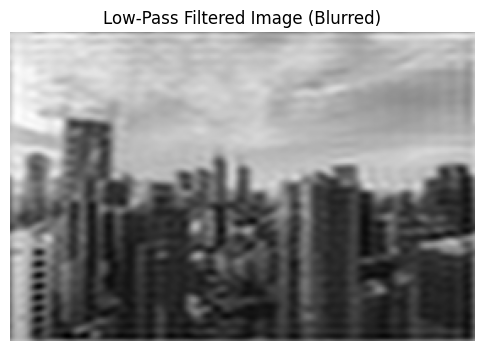

In [ ]:
rows, cols = image.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply mask and inverse DFT
fshift = dft_shift * mask
idft_shift_lpf = np.fft.ifftshift(fshift)
image_lpf = cv2.idft(idft_shift_lpf)
image_lpf = cv2.magnitude(image_lpf[:,:,0], image_lpf[:,:,1])

plt.figure(figsize=(6,6))
plt.title('Low-Pass Filtered Image (Blurred)')
plt.imshow(image_lpf, cmap='gray')
plt.axis('off')
plt.show()

**High-Pass Filtering (Sharpening)**

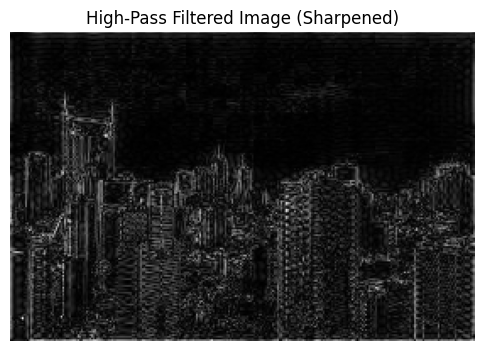

In [ ]:
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply mask and inverse DFT
fshift = dft_shift * mask
idft_shift_hpf = np.fft.ifftshift(fshift)
image_hpf = cv2.idft(idft_shift_hpf)
image_hpf = cv2.magnitude(image_hpf[:,:,0], image_hpf[:,:,1])

plt.figure(figsize=(6,6))
plt.title('High-Pass Filtered Image (Sharpened)')
plt.imshow(image_hpf, cmap='gray')
plt.axis('off')
plt.show()

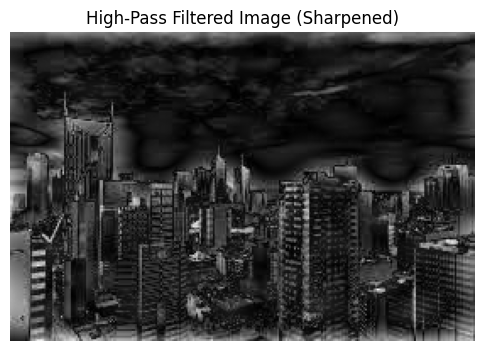

In [ ]:
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-5:crow+5, ccol-5:ccol+5] = 0

# Apply mask and inverse DFT
fshift = dft_shift * mask
idft_shift_hpf = np.fft.ifftshift(fshift)
image_hpf = cv2.idft(idft_shift_hpf)
image_hpf = cv2.magnitude(image_hpf[:,:,0], image_hpf[:,:,1])

plt.figure(figsize=(6,6))
plt.title('High-Pass Filtered Image (Sharpened)')
plt.imshow(image_hpf, cmap='gray')
plt.axis('off')
plt.show()

**Analysis:**

This image affects a smaller 10x10 pixel area and it is more smoother than the image which has 60x60 pixel area.

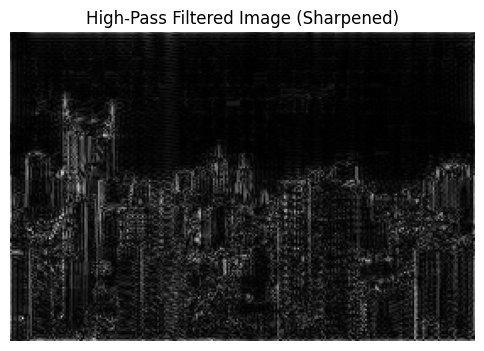

In [ ]:
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-50:crow+50, ccol-50:ccol+50] = 0

# Apply mask and inverse DFT
fshift = dft_shift * mask
idft_shift_hpf = np.fft.ifftshift(fshift)
image_hpf = cv2.idft(idft_shift_hpf)
image_hpf = cv2.magnitude(image_hpf[:,:,0], image_hpf[:,:,1])

plt.figure(figsize=(6,6))
plt.title('High-Pass Filtered Image (Sharpened)')
plt.imshow(image_hpf, cmap='gray')
plt.axis('off')
plt.show()

**Analysis:**

This image affects a larger 100x100 pixel area and it is less smoother than the image previous image which has 10x10 pixel area and 60x60 pixeal area.